# Mount Google Drive to access dataset

In [1]:
# Mount Google drive to access dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import required packages

In [2]:
#import necessary packages
# Import necessary packages
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
# import the packages required 
  
 
from IPython.display import display, HTML, clear_output
## Import the required packages ##
import math, numpy as np
import sklearn.datasets
import os
import h5py
import glob
import keras.utils as image
import tensorflow as tf

%load_ext tensorboard
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


# Load dataset

In [3]:
def loadDataset():

  ## Read all the train and test images and flatten them for training and testing
  train_path   = "./train"
  test_path    = "./test"
  train_labels = os.listdir(train_path)
  test_labels  = os.listdir(test_path) 

  image_size       = (45, 45)
  num_train_images = 3500
  num_test_images  = 1500

  train_x = np.zeros(((image_size[0]*image_size[1]), num_train_images))
  train_y = np.zeros((1, num_train_images))
  test_x  = np.zeros(((image_size[0]*image_size[1]), num_test_images))
  test_y  = np.zeros((1, num_test_images))

  #----------------
  # TRAIN dataset
  #----------------
  count = 0
  num_label = 0
  for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    print(glob.glob(cur_path + "/*.jpg"))
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = cv2.imread(image_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #print(image_path)
      x   = np.asarray(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      train_x[:,count] = x
      train_y[:,count] = num_label
      count += 1
    num_label += 1

  #--------------
  # TEST dataset
  #--------------
  count = 0 
  num_label = 0 
  for i, label in enumerate(test_labels):
    cur_path = test_path + "/" + label
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = cv2.imread(image_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      x   = np.asarray(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      test_x[:,count] = x
      test_y[:,count] = num_label
      count += 1
    num_label += 1

  #------------------
  # standardization
  #------------------
  train_x = train_x/255.
  test_x  = test_x/255.


  ## Print the statistics of the data
  print ("train_labels : " + str(train_labels))
  print ("train_x shape: " + str(train_x.shape))
  print ("train_y shape: " + str(train_y.shape))
  print ("test_x shape : " + str(test_x.shape))
  print ("test_y shape : " + str(test_y.shape))

  #-----------------
  # save using h5py
  #-----------------
  h5_train = h5py.File("train_x.h5", 'w')
  h5_train.create_dataset("data_train", data=np.array(train_x))
  h5_train.close()

  h5_test = h5py.File("test_x.h5", 'w')
  h5_test.create_dataset("data_test", data=np.array(test_x))
  h5_test.close()

  return train_x, train_y, test_x, test_y

In [4]:
# Change directory to load dataset
%cd /content/gdrive/MyDrive/42028/ASSESSMENT_1_A/Train_Test_Folder

/content/gdrive/MyDrive/42028/ASSESSMENT_1_A/Train_Test_Folder


In [5]:
# Load dataset
X_train, y_train, X_test, y_test = loadDataset()

['./train/!/exp22012.jpg', './train/!/exp10309.jpg', './train/!/exp23386.jpg', './train/!/exp21731.jpg', './train/!/!_15475.jpg', './train/!/exp11407.jpg', './train/!/exp28682.jpg', './train/!/exp101071.jpg', './train/!/!_95964.jpg', './train/!/exp16347.jpg', './train/!/exp24677.jpg', './train/!/exp13461.jpg', './train/!/!_25845.jpg', './train/!/exp13456.jpg', './train/!/exp81442.jpg', './train/!/exp100213.jpg', './train/!/exp89445.jpg', './train/!/!_14337.jpg', './train/!/exp17420.jpg', './train/!/exp20594.jpg', './train/!/exp11401.jpg', './train/!/!_12590.jpg', './train/!/!_95970.jpg', './train/!/exp21739.jpg', './train/!/exp9755.jpg', './train/!/exp10843.jpg', './train/!/exp22084.jpg', './train/!/exp26429.jpg', './train/!/exp9967.jpg', './train/!/!_9086.jpg', './train/!/exp9745.jpg', './train/!/exp22342.jpg', './train/!/exp12774.jpg', './train/!/exp84995.jpg', './train/!/!_25553.jpg', './train/!/exp11043.jpg', './train/!/exp12011.jpg', './train/!/exp22623.jpg', './train/!/exp97390.j

# Visualization of samples

In [6]:
# Transpose features
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [7]:
labelNames = ['!', '-', 'div', 'geq', 'leq', 'neq', 'pi', 'pm', 'sum', 'theta']

In [8]:
# Reshape features
X_train=X_train.reshape(-1,45,45)
X_test=X_test.reshape(-1,45,45)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(3500, 45, 45)
Test dataset after reshaping :(1500, 45, 45)


['!']
['-']
['leq']
['pm']


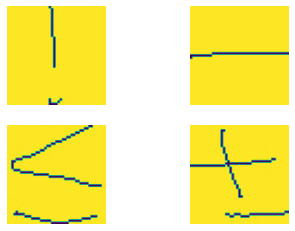

In [9]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(np.array(labelNames)[y_train[img_index].astype(int)])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 500
ax2.imshow(X_train[img_index])
print(np.array(labelNames)[y_train[img_index].astype(int)])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 1500
ax2.imshow(X_train[img_index])
print(np.array(labelNames)[y_train[img_index].astype(int)])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 2500
ax2.imshow(X_train[img_index])
print(np.array(labelNames)[y_train[img_index].astype(int)])
